# Polynominal regression

## Task

- Load dataset with sizes and prices
- Explore and display the data
- Create a linear model and find out its R2
- Create polynomial models with different degrees, find their R2
- Select the best model 

# Data loading

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv ("..\dataset\prices.csv",  sep=';')

In [3]:
data=data.dropna()
data.head()

,Size,Price
0,51.00000,901.18810
1,70.36735,972.23867
2,89.73469,1001.99394
3,109.10204,1024.90830
4,128.46939,1053.72491


# Linear model
- standardize the data
- create and train a linear model
- display model parameters
- visualize the linear model
- display model scores

In [4]:
# Estandarización (Z-score scaling)
def rescale(X):
    mean = X.mean()
    std = X.std()
    scaled_X = [(i - mean)/std for i in X]
    return pd.Series(scaled_X)

data_std = pd.DataFrame(columns=data.columns)
for i in data.columns:
    data_std[i] = rescale(data[i])

data_std.describe()

,Size,Price
count,6.200000e+01,6.200000e+01
mean,3.187414e-16,-2.467560e-15
std,1.000000e+00,1.000000e+00
min,-1.690536e+00,-2.877085e+00
25%,-8.452679e-01,-5.836494e-01
50%,1.186304e-08,2.048456e-01
75%,8.452678e-01,8.083945e-01
max,1.690536e+00,1.348537e+00


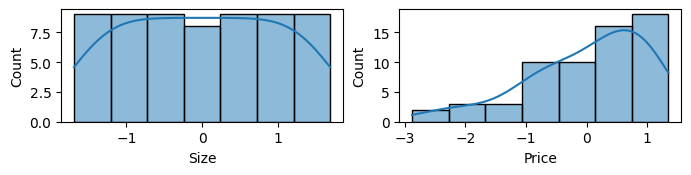

In [7]:
#Visualize the new data
pos = 1
fig = plt.figure(figsize=(8,12))
for i in data_std.columns:
    ax = fig.add_subplot(7,2, pos)
    pos = pos + 1
    sns.histplot(data_std[i],ax=ax, kde=True)

LINEAR MODEL

In [23]:
#Split the data into training and test data and create a linear model
X = pd.DataFrame(np.c_[data['Size']], columns = ['Size'])
Y = data['Price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#Print model parameters
print ("Bias: ", lin_model.intercept_)
print("Váhy: ", lin_model.coef_)

Bias:  1142.8725879062422
Váhy:  [0.27089523]


In [29]:
#Display model score
def print_model_score(Y_train, y_train_predict, label):
    r2 = r2_score(Y_train, y_train_predict)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))    
    print(f"{label} R2 score: {r2}")
    print(f"{label} RMSE: {rmse}")

In [30]:
#Display model score for training data
Y_predicted = lin_model.predict(X_train)
Y_test_predicted = lin_model.predict(X_test)

print_model_score(Y_train, Y_predicted, "Train")

Train R2 score: 0.43140616830472167
Train RMSE: 113.39422607377513


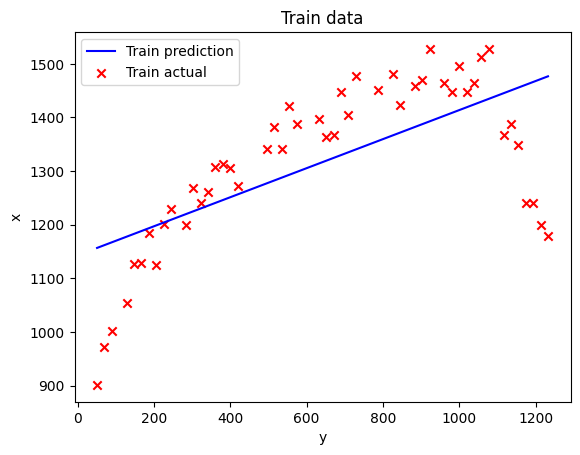

In [35]:
#Visualize the linear model
def visualize_model_2d (X, Y, Y_predicted, title="Linear model", x_label="x", y_label="y"):
    # Asegurarse de que X sea un array 1D
    if hasattr(X, 'values'):
        X = X.values.flatten()
    elif hasattr(X, 'flatten'):
        X = X.flatten()
    elif hasattr(X, 'to_numpy'):
         X = X.to_numpy().flatten()
         
    prediction = np.zeros((X.shape[0], 3))
    prediction[:,0]=X
    prediction[:,1]=Y
    prediction[:,2]=Y_predicted
    prediction=prediction[prediction[:, 0].argsort()]    
            
    fig1 = plt.figure() 
    plt.plot (prediction[:,0], prediction[:,2], c='b', label = "Train prediction")
    plt.scatter (prediction[:,0], prediction[:,1], marker = 'x', c='r', label="Train actual")
    plt.title (title)
    plt.ylabel(x_label)
    plt.xlabel(y_label)
    plt.legend()
    plt.show()

visualize_model_2d(X_train, Y_train, Y_predicted, "Train data")

# Create a polynomial regression model
- create a polynomial 1D model with steps 2 - 8
- display models
- display their parameters
- show their scores
- Which model would you choose?

In [ ]:
#I would choose polynomial (degree 2) as it has a higher R2 score.

In [43]:
def polynomial_fit(X, Y, degree = 1):
     # Asegurarse de que X sea un array 1D
    if hasattr(X, 'values'):
        X = X.values.flatten()
    elif hasattr(X, 'flatten'):
        X = X.flatten()
    elif hasattr(X, 'to_numpy'):
         X = X.to_numpy().flatten()
    return np.poly1d(np.polyfit(X, Y, degree))

def visualize_model (p, X_train, Y_train, X_test, Y_test, degree, x_label = "Size", y_label = "Price"):              
    fig1 = plt.figure()    
    plt.scatter (X_train, Y_train, c='r', label="Train ")
    plt.scatter (X_test, Y_test, c='b', label="Test ")
    
    curve_x = np.arange(min(X_train), max(max(X_train), max(X_test)), 0.01)    
    plt.plot(curve_x, p(curve_x), label=f"Polynomial of degree {degree}")  
            
    plt.title ("Model")
    plt.ylabel(x_label)
    plt.xlabel(y_label)
    plt.legend()
    plt.show()

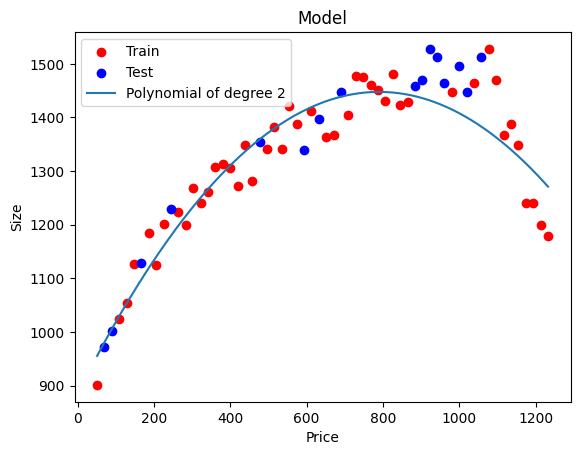

Váhy:  [-9.01907125e-04  1.42478909e+00  8.84959622e+02]
Train R2 score: -3.452488231719622
Train RMSE: 282.71913542951586
Test R2 score: -4.19482611797544
Test RMSE: 400.15213256001294


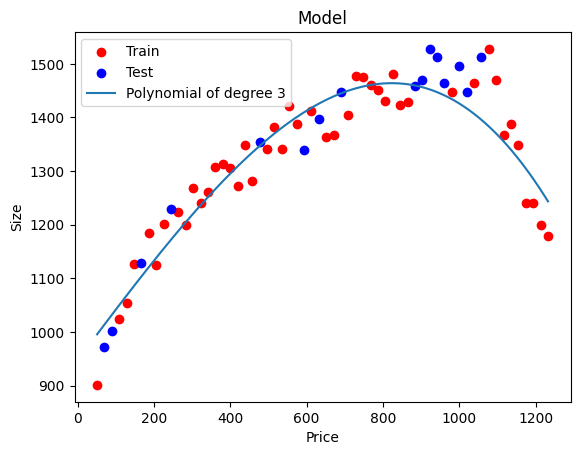

Váhy:  [-4.48549628e-07 -2.46677413e-05  9.52149990e-01  9.47087686e+02]
Train R2 score: -6.767034462566521
Train RMSE: 373.40611861988
Test R2 score: -8.111384703002466
Test RMSE: 529.9462459410977


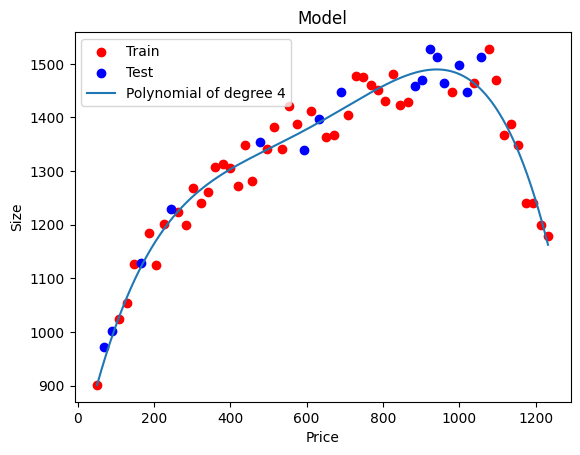

Váhy:  [-3.51399954e-09  8.50032384e-06 -7.49495479e-03  3.23499199e+00
  7.54520463e+02]
Train R2 score: -45.42245617364234
Train RMSE: 912.8887842762929
Test R2 score: -57.435280928215406
Test RMSE: 1342.076266207275


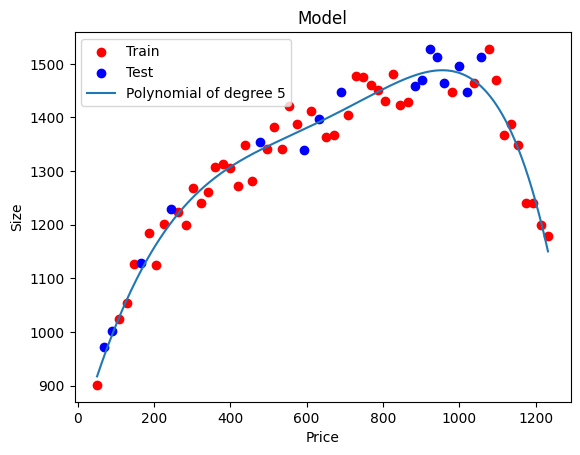

Váhy:  [-1.77900415e-12  2.24012289e-09  1.76307986e-06 -4.05253315e-03
  2.51207209e+00  7.99295355e+02]
Train R2 score: -65.03754997015233
Train RMSE: 1088.8029530729264
Test R2 score: -84.66447839909866
Test RMSE: 1624.9500497611323


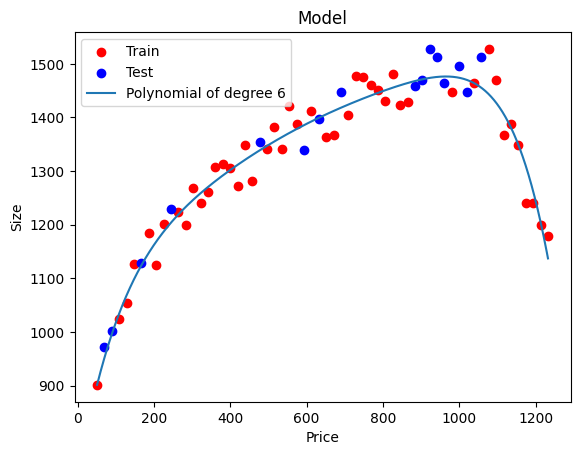

Váhy:  [-7.31409127e-15  2.63812342e-11 -3.92276500e-08  3.09415166e-05
 -1.40452874e-02  4.00867477e+00  7.29601299e+02]
Train R2 score: -137.4889513944471
Train RMSE: 1576.744691068239
Test R2 score: -195.4529438426612
Test RMSE: 2460.757959946612


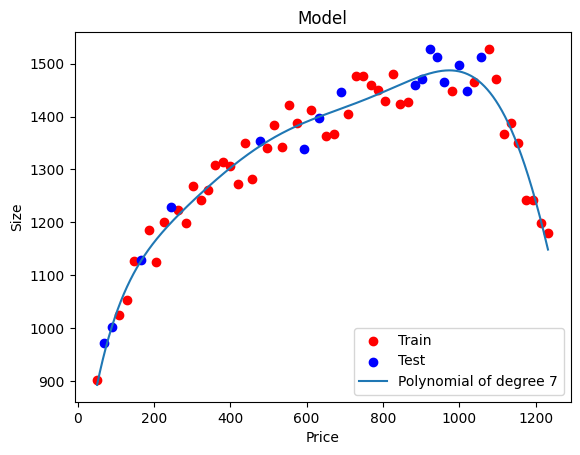

Váhy:  [ 1.90583492e-17 -9.20906159e-14  1.76826670e-10 -1.75047994e-07
  9.67894385e-05 -3.06240342e-02  5.91481886e+00  6.58635862e+02]
Train R2 score: -23.10540895715774
Train RMSE: 657.826047355961
Test R2 score: -19.42076964277491
Test RMSE: 793.3698299302029


In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

for degree in range (2, 8):
    p = polynomial_fit(X_train, Y_train, degree)  
    visualize_model (p, X_train, Y_train, X_test, Y_test, degree)    
    print("Váhy: ", p.coef)
    print_model_score(Y_train, p(Y_train), "Train")
    print_model_score(Y_test, p(Y_test), "Test")